In [ ]:
import sys
print(sys.version)


3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
from wordcloud import WordCloud


In [ ]:
pip install bnlp_toolkit

## Necessary Modules Import

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler,
                                    NearMiss,
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import time
import plotly.express as px
import bnlp

In [ ]:
# from bnlp.corpus import stopwords, punctuations, letters, digits
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier

In [ ]:
# from bnlp.corpus.util import remove_stopwords


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Dataset Import


In [ ]:
reviews_df = pd.read_excel("/content/Updated Reviews Datasets (1).xlsx",)

In [ ]:
reviews_df.head(3)

,Product Name,Customer Name,Reviews,Sentiment,Category,Product Link
0,LED Dream Mushroom Lamp - multi color,Abayzid,❤️❤️❤️❤️ প্রোডাক্টটা খুবই ভালো ছিল ধন্যবাদ সেল...,1,Home & Lifestyle,https://www.daraz.com.bd/products/led-i1840900...
1,LED Dream Mushroom Lamp - multi color,Alamin,😍 আলহামদুলিল্লাহ আমি আলামিন দারাজ কোম্পানির এই...,1,Home & Lifestyle,https://www.daraz.com.bd/products/led-i1840900...
2,LED Dream Mushroom Lamp - multi color,Mahmud,"🙂🙂 ছবি দেখে যেমনটা ভেবেছিলাম ঠিক ততটা না, আলোট...",0,Home & Lifestyle,https://www.daraz.com.bd/products/led-i1840900...


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   1913 non-null   object
 1   Customer Name  1655 non-null   object
 2   Reviews        2095 non-null   object
 3   Sentiment      2095 non-null   int64 
 4   Category       1913 non-null   object
 5   Product Link   1836 non-null   object
dtypes: int64(1), object(5)
memory usage: 98.3+ KB


In [ ]:
dorkari_df = reviews_df[['Reviews', 'Sentiment']]

In [ ]:
dorkari_df = dorkari_df.dropna()

In [ ]:
dorkari_df

,Reviews,Sentiment
0,❤️❤️❤️❤️ প্রোডাক্টটা খুবই ভালো ছিল ধন্যবাদ সেল...,1
1,😍 আলহামদুলিল্লাহ আমি আলামিন দারাজ কোম্পানির এই...,1
2,"🙂🙂 ছবি দেখে যেমনটা ভেবেছিলাম ঠিক ততটা না, আলোট...",0
3,মোটামুটি ঠিক আছে কিন্তু দেওয়ালের লাগার পরে জি...,0
4,খুব বাজে দেওয়ালে লাগালেও থাকে না। কিছু রাখা যা...,-1
...,...,...
2090,নাইস ওয়াচ,1
2091,ভালো ছিলো,1
2092,ভালো,1
2093,ভালোই,1


In [ ]:
dorkari_df['Sentiment'] = dorkari_df['Sentiment'].astype(int)

In [ ]:
dorkari_df

,Reviews,Sentiment
0,❤️❤️❤️❤️ প্রোডাক্টটা খুবই ভালো ছিল ধন্যবাদ সেল...,1
1,😍 আলহামদুলিল্লাহ আমি আলামিন দারাজ কোম্পানির এই...,1
2,"🙂🙂 ছবি দেখে যেমনটা ভেবেছিলাম ঠিক ততটা না, আলোট...",0
3,মোটামুটি ঠিক আছে কিন্তু দেওয়ালের লাগার পরে জি...,0
4,খুব বাজে দেওয়ালে লাগালেও থাকে না। কিছু রাখা যা...,-1
...,...,...
2090,নাইস ওয়াচ,1
2091,ভালো ছিলো,1
2092,ভালো,1
2093,ভালোই,1


## Pre-processing dataset

### Removing punctuations and emojis

In [ ]:
def remove_punctuation(d):
    punctuations = '''“”!()-[]{};:'"\,<>./?@#$%^&*_~�।’‘Ôø√ºß√√≥'''
    review = d.replace('\n', '')
    no_punct = ""
    for char in review:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [ ]:
def text_preprocess(text):
#     processed_array = []
    emoji_pattern = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"
    "]+"
)
    text = emoji_pattern.sub(r'',text)
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    text = remove_punctuation(text)
    words = text.split()
    process_words = []
    for word in words:
        if re.match(r'^[a-zA-Z]+$', word):
            process_words.append(word.lower())
        else:
            process_words.append(word)

    return ' '.join(process_words)

In [ ]:
dorkari_df['processed'] = dorkari_df['Reviews'].apply(text_preprocess)

In [ ]:
# dorkari_df['processed'][164]

In [ ]:
dorkari_df.head(4)

,Reviews,Sentiment,processed
0,❤️❤️❤️❤️ প্রোডাক্টটা খুবই ভালো ছিল ধন্যবাদ সেল...,1,প্রোডাক্টটা খুবই ভালো ছিল ধন্যবাদ সেলার কে
1,😍 আলহামদুলিল্লাহ আমি আলামিন দারাজ কোম্পানির এই...,1,আলহামদুলিল্লাহ আমি আলামিন দারাজ কোম্পানির এই এ...
2,"🙂🙂 ছবি দেখে যেমনটা ভেবেছিলাম ঠিক ততটা না, আলোট...",0,ছবি দেখে যেমনটা ভেবেছিলাম ঠিক ততটা না আলোটা এক...
3,মোটামুটি ঠিক আছে কিন্তু দেওয়ালের লাগার পরে জি...,0,মোটামুটি ঠিক আছে কিন্তু দেওয়ালের লাগার পরে জি...


### Removing stopwords

In [ ]:
bengali_stopwords = [
        "অতএব",
        "অথচ",
        "অথবা",
        "অনুযায়ী",
        "অনেক",
        "অনেকে",
        "অনেকেই",
        "অন্তত",
        "অন্য",
        "অবধি",
        "অবশ্য",
        "অর্থাত",
        "আই",
        "আগামী",
        "আগে",
        "আগেই",
        "আছে",
        "আজ",
        "আদ্যভাগে",
        "আপনার",
        "আপনি",
        "আবার",
        "আমরা",
        "আমাকে",
        "আমাদের",
        "আমার",
        "আমি",
        "আর",
        "আরও",
        "ই",
        "ইত্যাদি",
        "ইহা",
        "উচিত",
        "উত্তর",
        "উনি",
        "উপর",
        "উপরে",
        "এ",
        "এঁদের",
        "এঁরা",
        "এই",
        "একই",
        "একটি",
        "একবার",
        "একে",
        "এক্",
        "এখন",
        "এখনও",
        "এখানে",
        "এখানেই",
        "এটা",
        "এটাই",
        "এটি",
        "এত",
        "এতটাই",
        "এতে",
        "এদের",
        "এব",
        "এবং",
        "এবার",
        "এমন",
        "এমনকী",
        "এমনি",
        "এর",
        "এরা",
        "এল",
        "এস",
        "এসে",
        "ঐ",
        "ও",
        "ওঁদের",
        "ওঁর",
        "ওঁরা",
        "ওই",
        "ওকে",
        "ওখানে",
        "ওদের",
        "ওর",
        "ওরা",
        "কখনও",
        "কত",
        "কবে",
        "কমনে",
        "কয়েক",
        "কয়েকটি",
        "করছে",
        "করছেন",
        "করতে",
        "করবে",
        "করবেন",
        "করলে",
        "করলেন",
        "করা",
        "করাই",
        "করায়",
        "করার",
        "করি",
        "করিতে",
        "করিয়া",
        "করিয়ে",
        "করে",
        "করেই",
        "করেছিলেন",
        "করেছে",
        "করেছেন",
        "করেন",
        "কাউকে",
        "কাছ",
        "কাছে",
        "কাজ",
        "কাজে",
        "কারও",
        "কারণ",
        "কি",
        "কিংবা",
        "কিছু",
        "কিছুই",
        "কিন্তু",
        "কী",
        "কে",
        "কেউ",
        "কেউই",
        "কেখা",
        "কেন",
        "কোটি",
        "কোন",
        "কোনও",
        "কোনো",
        "ক্ষেত্রে",
        "কয়েক",
        "খুব",
        "গিয়ে",
        "গিয়েছে",
        "গিয়ে",
        "গুলি",
        "গেছে",
        "গেল",
        "গেলে",
        "গোটা",
        "চলে",
        "চান",
        "চায়",
        "চার",
        "চালু",
        "চেয়ে",
        "চেষ্টা",
        "ছাড়া",
        "ছাড়াও",
        "ছিল",
        "ছিলেন",
        "জন",
        "জনকে",
        "জনের",
        "জন্য",
        "জন্যওজে",
        "জানতে",
        "জানা",
        "জানানো",
        "জানায়",
        "জানিয়ে",
        "জানিয়েছে",
        "জে",
        "জ্নজন",
        "টি",
        "ঠিক",
        "তখন",
        "তত",
        "তথা",
        "তবু",
        "তবে",
        "তা",
        "তাঁকে",
        "তাঁদের",
        "তাঁর",
        "তাঁরা",
        "তাঁাহারা",
        "তাই",
        "তাও",
        "তাকে",
        "তাতে",
        "তাদের",
        "তার",
        "তারপর",
        "তারা",
        "তারৈ",
        "তাহলে",
        "তাহা",
        "তাহাতে",
        "তাহার",
        "তিনঐ",
        "তিনি",
        "তিনিও",
        "তুমি",
        "তুলে",
        "তেমন",
        "তো",
        "তোমার",
        "থাকবে",
        "থাকবেন",
        "থাকা",
        "থাকায়",
        "থাকে",
        "থাকেন",
        "থেকে",
        "থেকেই",
        "থেকেও",
        "দিকে",
        "দিতে",
        "দিন",
        "দিয়ে",
        "দিয়েছে",
        "দিয়েছেন",
        "দিলেন",
        "দু",
        "দুই",
        "দুটি",
        "দুটো",
        "দেওয়া",
        "দেওয়ার",
        "দেওয়া",
        "দেখতে",
        "দেখা",
        "দেখে",
        "দেন",
        "দেয়",
        "দ্বারা",
        "ধরা",
        "ধরে",
        "ধামার",
        "নতুন",
        "নয়",
        "না",
        "নাই",
        "নাকি",
        "নাগাদ",
        "নানা",
        "নিজে",
        "নিজেই",
        "নিজেদের",
        "নিজের",
        "নিতে",
        "নিয়ে",
        "নিয়ে",
        "নেই",
        "নেওয়া",
        "নেওয়ার",
        "নেওয়া",
        "নয়",
        "পক্ষে",
        "পর",
        "পরে",
        "পরেই",
        "পরেও",
        "পর্যন্ত",
        "পাওয়া",
        "পাচ",
        "পারি",
        "পারে",
        "পারেন",
        "পি",
        "পেয়ে",
        "পেয়্র্",
        "প্রতি",
        "প্রথম",
        "প্রভৃতি",
        "প্রযন্ত",
        "প্রাথমিক",
        "প্রায়",
        "প্রায়",
        "ফলে",
        "ফিরে",
        "ফের",
        "বক্তব্য",
        "বদলে",
        "বন",
        "বরং",
        "বলতে",
        "বলল",
        "বললেন",
        "বলা",
        "বলে",
        "বলেছেন",
        "বলেন",
        "বসে",
        "বহু",
        "বা",
        "বাদে",
        "বার",
        "বি",
        "বিনা",
        "বিভিন্ন",
        "বিশেষ",
        "বিষয়টি",
        "বেশ",
        "বেশি",
        "ব্যবহার",
        "ব্যাপারে",
        "ভাবে",
        "ভাবেই",
        "মতো",
        "মতোই",
        "মধ্যভাগে",
        "মধ্যে",
        "মধ্যেই",
        "মধ্যেও",
        "মনে",
        "মাত্র",
        "মাধ্যমে",
        "মোট",
        "মোটেই",
        "যখন",
        "যত",
        "যতটা",
        "যথেষ্ট",
        "যদি",
        "যদিও",
        "যা",
        "যাঁর",
        "যাঁরা",
        "যাওয়া",
        "যাওয়ার",
        "যাওয়া",
        "যাকে",
        "যাচ্ছে",
        "যাতে",
        "যাদের",
        "যান",
        "যাবে",
        "যায়",
        "যার",
        "যারা",
        "যিনি",
        "যে",
        "যেখানে",
        "যেতে",
        "যেন",
        "যেমন",
        "র",
        "রকম",
        "রয়েছে",
        "রাখা",
        "রেখে",
        "লক্ষ",
        "শুধু",
        "শুরু",
        "সঙ্গে",
        "সঙ্গেও",
        "সব",
        "সবার",
        "সমস্ত",
        "সম্প্রতি",
        "সহ",
        "সহিত",
        "সাধারণ",
        "সামনে",
        "সি",
        "সুতরাং",
        "সে",
        "সেই",
        "সেখান",
        "সেখানে",
        "সেটা",
        "সেটাই",
        "সেটাও",
        "সেটি",
        "স্পষ্ট",
        "স্বয়ং",
        "হইতে",
        "হইবে",
        "হইয়া",
        "হওয়া",
        "হওয়ায়",
        "হওয়ার",
        "হচ্ছে",
        "হত",
        "হতে",
        "হতেই",
        "হন",
        "হবে",
        "হবেন",
        "হয়",
        "হয়তো",
        "হয়নি",
        "হয়ে",
        "হয়েই",
        "হয়েছিল",
        "হয়েছে",
        "হয়েছেন",
        "হল",
        "হলে",
        "হলেই",
        "হলেও",
        "হলো",
        "হাজার",
        "হিসাবে",
        "হৈলে",
        "হোক",
        "হয়",
    ]

In [ ]:
def remove_stopwords(line, stopwords):
  words = []
  for word in line.split():
    if word not in stopwords:
      words.append(word)

  return words

In [ ]:
def clean_stopwords(line):
  result = remove_stopwords(line, bengali_stopwords)
  final_result = " ".join(result)
  return final_result

In [ ]:
clean_stopwords(dorkari_df['processed'][0])

'প্রোডাক্টটা খুবই ভালো ধন্যবাদ সেলার'

In [ ]:
dorkari_df['processed'] = dorkari_df['processed'].apply(clean_stopwords)

In [ ]:
dorkari_df

,Reviews,Sentiment,processed
0,❤️❤️❤️❤️ প্রোডাক্টটা খুবই ভালো ছিল ধন্যবাদ সেল...,1,প্রোডাক্টটা খুবই ভালো ধন্যবাদ সেলার
1,😍 আলহামদুলিল্লাহ আমি আলামিন দারাজ কোম্পানির এই...,1,আলহামদুলিল্লাহ আলামিন দারাজ কোম্পানির এলইডি লা...
2,"🙂🙂 ছবি দেখে যেমনটা ভেবেছিলাম ঠিক ততটা না, আলোট...",0,ছবি যেমনটা ভেবেছিলাম ততটা আলোটা একটু কম বাকি স...
3,মোটামুটি ঠিক আছে কিন্তু দেওয়ালের লাগার পরে জি...,0,মোটামুটি দেওয়ালের লাগার জিনিস রাখার পারব
4,খুব বাজে দেওয়ালে লাগালেও থাকে না। কিছু রাখা যা...,-1,বাজে দেওয়ালে লাগালেও যায় টাকার নষ্ট
...,...,...,...
2090,নাইস ওয়াচ,1,নাইস ওয়াচ
2091,ভালো ছিলো,1,ভালো ছিলো
2092,ভালো,1,ভালো
2093,ভালোই,1,ভালোই


In [ ]:
final_dorkari_df = dorkari_df[['processed', 'Sentiment']]

In [ ]:
final_dorkari_df.tail(10)

,processed,Sentiment
2085,সুন্দর ঘড়ি,1
2086,ভালোই,1
2087,ভালো ছিলো,1
2088,ভালো,1
2089,ভালো,1
2090,নাইস ওয়াচ,1
2091,ভালো ছিলো,1
2092,ভালো,1
2093,ভালোই,1
2094,ভালো,1


In [ ]:
final_dorkari_df.head(10)

,processed,Sentiment
0,প্রোডাক্টটা খুবই ভালো ধন্যবাদ সেলার,1
1,আলহামদুলিল্লাহ আলামিন দারাজ কোম্পানির এলইডি লা...,1
2,ছবি যেমনটা ভেবেছিলাম ততটা আলোটা একটু কম বাকি স...,0
3,মোটামুটি দেওয়ালের লাগার জিনিস রাখার পারব,0
4,বাজে দেওয়ালে লাগালেও যায় টাকার নষ্ট,-1
5,খারাপ খারাপ থাকলে একটা লাগানোর কিছুক্ষণ,-1
6,প্রোডাক্টটা খুবই চমৎকার ছবিতে দেখেছি পেয়েছি,1
7,লাইট কোয়ালিটি ভালো দারাজ ছবিতে ভাবছিলাম কালার ...,1
8,আলহামদুলিল্লাহ প্রোডাক্ট সুন্দরএকদম জেনুইন অথে...,1
9,ধন্যবাদ দারাজ সত্যিই খুবি সুন্দর টা চেয়ে ছিলাম...,1


In [ ]:
all_text = ' '.join(final_dorkari_df['processed'])


**Word cloud**

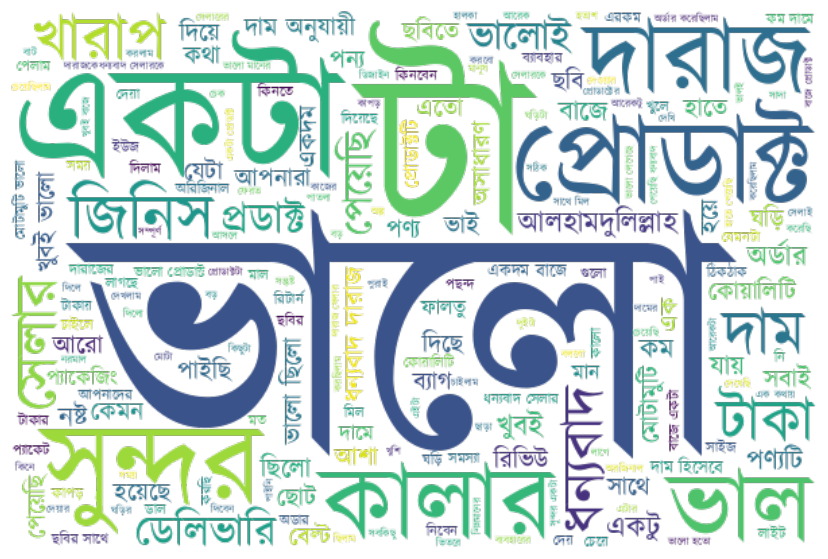

In [ ]:
regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=600, height=400,mode="RGBA",background_color=None,
font_path="kalpurush.ttf",regexp=regex).generate(all_text)
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
classes = final_dorkari_df['Sentiment'].value_counts().index
observations = final_dorkari_df['Sentiment'].value_counts().values

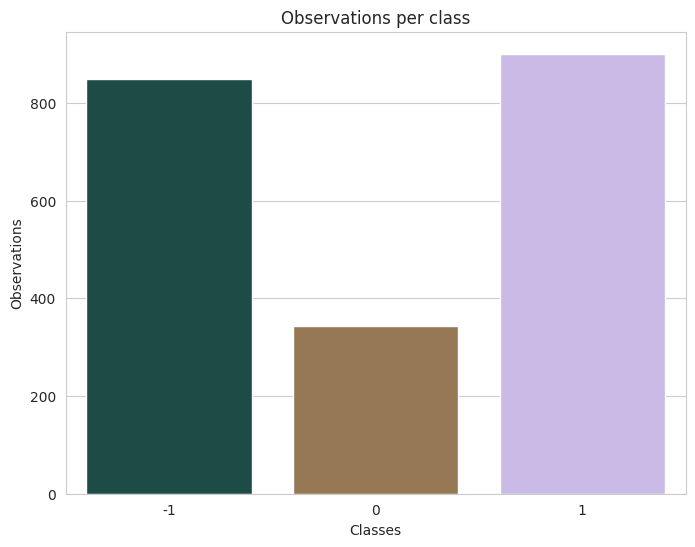

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=classes, y=observations, palette='cubehelix')
# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Observations')
plt.title('Observations per class')

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert the labels to integers
label_encoder = LabelEncoder()
final_dorkari_df['Sentiment'] = label_encoder.fit_transform(final_dorkari_df['Sentiment'])

In [ ]:
classes = final_dorkari_df['Sentiment'].value_counts().index
observations = final_dorkari_df['Sentiment'].value_counts().values

In [ ]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(8,6))
# sns.barplot(x=classes, y=observations, palette='cubehelix')
# # Add labels and title
# plt.xlabel('Classes')
# plt.ylabel('Observations')
# plt.title('Observations per class')

# # Show the plot
# plt.show()

In [ ]:
final_dorkari_df.to_excel("Processed Datasets.xlsx", index = False)

## Train-test split

### Actual Data


**Train-test-split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    final_dorkari_df['processed'], final_dorkari_df['Sentiment'], test_size= 0.2, stratify= final_dorkari_df['Sentiment'], random_state = 42)

**Count vectorizer and Tf-IDf**

In [ ]:
# Create feature vectors
vectorizer = TfidfVectorizer(
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

### OverSampled Data

In [ ]:
sm = SMOTE(random_state= 777,)
sm_xtrain_tfidf, sm_train_y = sm.fit_resample(train_vectors, y_train)

### Under Sampled Data

In [ ]:
tl = TomekLinks()
tl_xtrain_tfidf, tl_train_y = tl.fit_resample(train_vectors, y_train)

## Model Training And Visualization

### Actual Data

In [ ]:
training_time = []
accuracy = []
models = ["SVM", "Logistic Regression", "KNN", "XGBoost", "Random Forest", "Naive Bayes", "LGBM"]

In [ ]:
def print_confusion_metrics(true,pred):
  cm = confusion_matrix(true, pred)
  plt.figure(figsize=(4,4))
  sns.heatmap(cm, annot=True, fmt='g', xticklabels=[-1,0,1], yticklabels=[-1,0,1])
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()

In [ ]:
def print_metrices(true,pred):
    print(print_confusion_metrics(true,pred))
    print(classification_report(true,pred,target_names=['negative','neutral','positive']))
    print("Accuracy : ",accuracy_score(true,pred))
    accuracy.append(accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))


In [ ]:
from sklearn.preprocessing import label_binarize


In [ ]:
unique_labels = np.unique(y_test)
# Convert integer labels to one-hot encoded format
y_test_onehot = label_binarize(y_test, classes=unique_labels)

In [ ]:
from itertools import cycle
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_test_onehot, y_score):
    classes = [0, 1, 2]  # List of your class labels
    n_classes = len(classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_true_bin = label_binarize(y_test_onehot, classes=classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

    # Compute micro-averages and macro-averages
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["micro"] = all_fpr
    tpr["micro"] = mean_tpr
    roc_auc["micro"] = roc_auc_score(y_true_bin, y_score, average="micro")

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
      class_name = ""
      if class_id == 0:
        class_name = "Negative"
      elif class_id == 1:
        class_name = "Neutral"
      else:
        class_name = "Positive"
      RocCurveDisplay.from_predictions(
          y_test_onehot[:, class_id],
          y_score[:, class_id],
          name=f"ROC curve for {class_name}",
          color=color,
          ax=ax
      )

    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic\nto One-vs-Rest multiclass")
    plt.legend()
    plt.show()

# Example usage with fabricated data (replace with your actual data)



(1676, 1170)

In [ ]:
def train_predict_visualize(model, name, parameters):
  print(f"Model Name :{name}\n")
  t0 = time.time()
# Perform Grid Search
  # grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
  # grid_search.fit(train_vectors, list(y_train))
  # model.fit(train_vectors, list(y_train))
  model.fit(train_vectors, list(y_train))
  preds = model.predict(test_vectors)
  current_accuracy = accuracy_score(y_test,preds)
  preds_probability = model.predict_proba(test_vectors)
  plot_roc_curve(y_test_onehot, preds_probability)
  print_metrices(y_test,preds)
  # plot_roc_curve_multiclass(y_test,preds, classes_list)
  t1 = time.time()
  training_time.append(t1-t0)


In [ ]:
# from sklearn import svm
# # Perform classification with SVM, kernel=linear
# classifier_linear = svm.SVC(kernel='linear')
# t0 = time.time()
# classifier_linear.fit(train_vectors, list(train_df['author_labels']))
# t1 = time.time()
# prediction_linear = classifier_linear.predict(test_vectors)
# t2 = time.time()
# time_linear_train = t1-t0
# time_linear_predict = t2-t1

**SVM**

Model Name :SVM



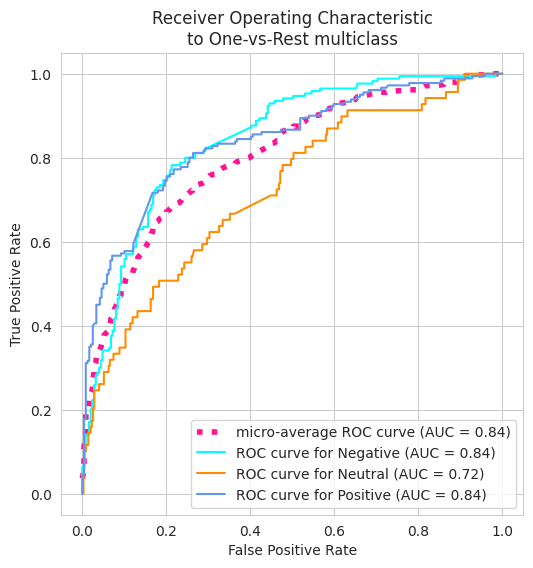

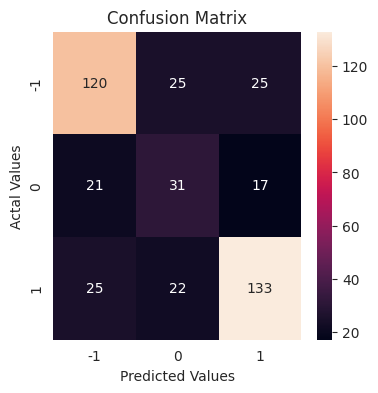

None
              precision    recall  f1-score   support

    negative       0.72      0.71      0.71       170
     neutral       0.40      0.45      0.42        69
    positive       0.76      0.74      0.75       180

    accuracy                           0.68       419
   macro avg       0.63      0.63      0.63       419
weighted avg       0.69      0.68      0.68       419

Accuracy :  0.6778042959427207
Precison :  0.685237811904862
Recall :  0.6778042959427207
F1 :  0.6811547772828583


In [ ]:
train_predict_visualize(SVC(kernel = 'linear', class_weight= 'balanced', probability= True), "SVM", parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight' : ['balanced'], 'probability' : [True]})

Logistic Regression
Naive Bayes classifier
K-nearest neighbors (KNN)
Random Forest
Lasso Regression
Ridge Regression
SVM – Linear Kernel
LightGBM Classifier
XGBoost
CatBoost Classifie

**Logistic Regression**

Model Name :Logistic Regression



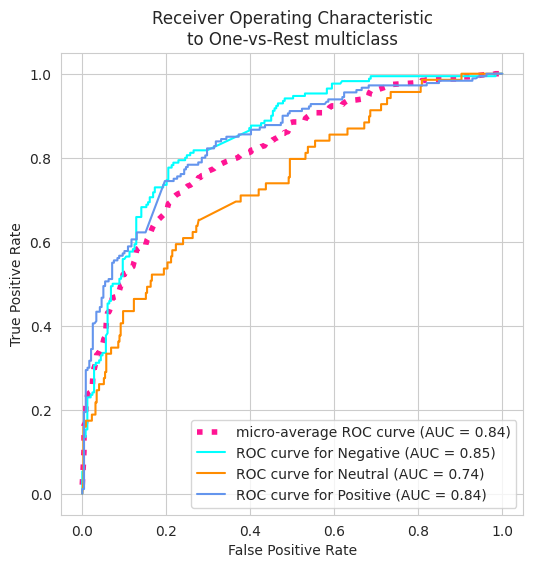

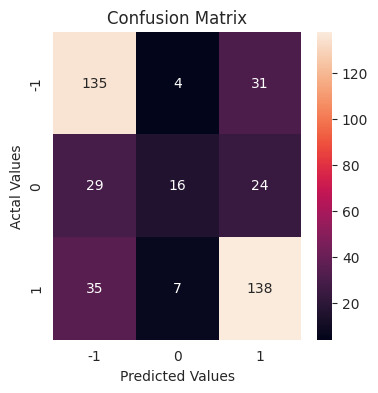

None
              precision    recall  f1-score   support

    negative       0.68      0.79      0.73       170
     neutral       0.59      0.23      0.33        69
    positive       0.72      0.77      0.74       180

    accuracy                           0.69       419
   macro avg       0.66      0.60      0.60       419
weighted avg       0.68      0.69      0.67       419

Accuracy :  0.6897374701670644
Precison :  0.6800004421650436
Recall :  0.6897374701670644
F1 :  0.6696434186823584


In [ ]:
train_predict_visualize(LogisticRegression(), "Logistic Regression", parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
)

**KNN**

Model Name :KNN



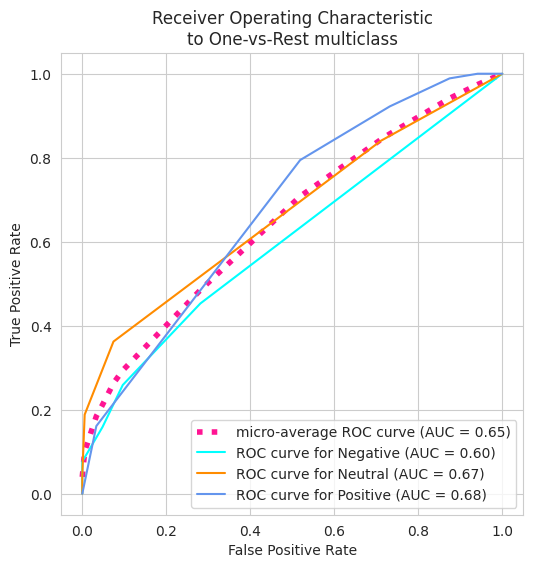

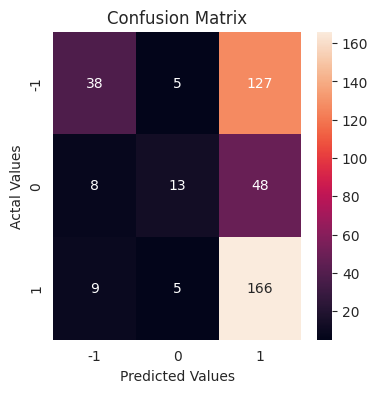

None
              precision    recall  f1-score   support

    negative       0.69      0.22      0.34       170
     neutral       0.57      0.19      0.28        69
    positive       0.49      0.92      0.64       180

    accuracy                           0.52       419
   macro avg       0.58      0.44      0.42       419
weighted avg       0.58      0.52      0.46       419

Accuracy :  0.5178997613365155
Precison :  0.5825278732353949
Recall :  0.5178997613365155
F1 :  0.4573382277416652


In [ ]:
train_predict_visualize(KNeighborsClassifier(), "KNN", parameters = {'n_neighbors': [3, 5, 7]})

**XGBoost**

Model Name :XGBoost



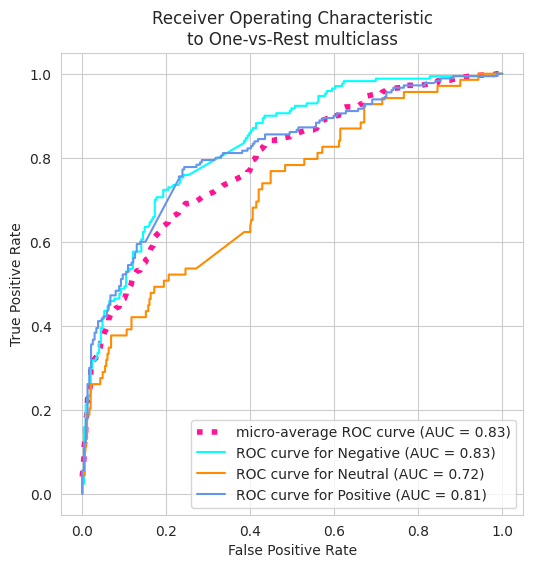

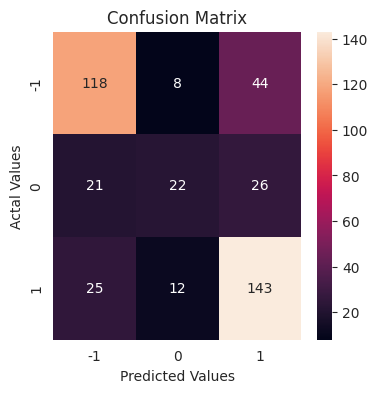

None
              precision    recall  f1-score   support

    negative       0.72      0.69      0.71       170
     neutral       0.52      0.32      0.40        69
    positive       0.67      0.79      0.73       180

    accuracy                           0.68       419
   macro avg       0.64      0.60      0.61       419
weighted avg       0.67      0.68      0.66       419

Accuracy :  0.6754176610978521
Precison :  0.6665990471029214
Recall :  0.6754176610978521
F1 :  0.6645906401971529


In [ ]:
train_predict_visualize(XGBClassifier(), "XGBoost", parameters = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]})

**Random Forest**

Model Name :Random Forest



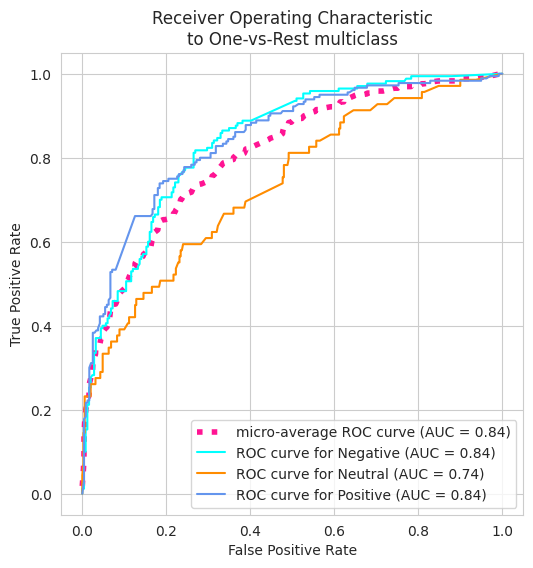

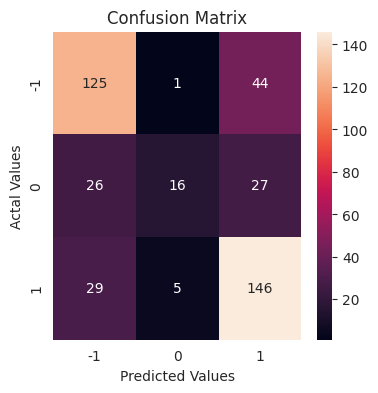

None
              precision    recall  f1-score   support

    negative       0.69      0.74      0.71       170
     neutral       0.73      0.23      0.35        69
    positive       0.67      0.81      0.74       180

    accuracy                           0.68       419
   macro avg       0.70      0.59      0.60       419
weighted avg       0.69      0.68      0.66       419

Accuracy :  0.684964200477327
Precison :  0.690556955896859
Recall :  0.684964200477327
F1 :  0.6636879589393372


In [ ]:
train_predict_visualize(RandomForestClassifier(), "Random Forest", parameters = {'n_estimators': [100, 200], 'max_depth': [5, 10]})

**Naive Bayes**

Model Name :Naive Bayes



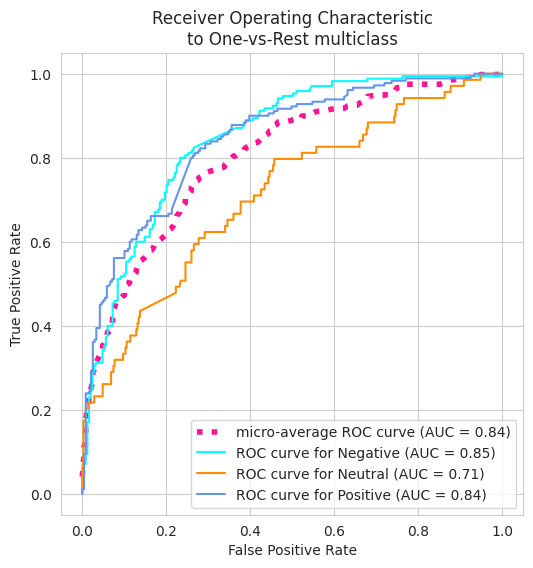

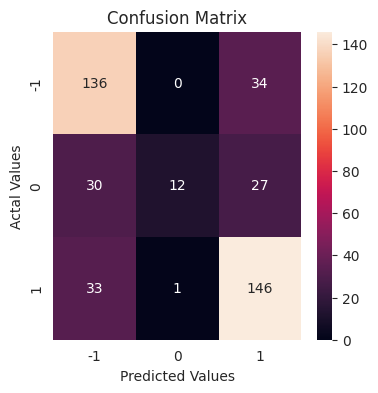

None
              precision    recall  f1-score   support

    negative       0.68      0.80      0.74       170
     neutral       0.92      0.17      0.29        69
    positive       0.71      0.81      0.75       180

    accuracy                           0.70       419
   macro avg       0.77      0.60      0.59       419
weighted avg       0.73      0.70      0.67       419

Accuracy :  0.7016706443914081
Precison :  0.7322905344965422
Recall :  0.7016706443914081
F1 :  0.6714098533559016


In [ ]:
train_predict_visualize(MultinomialNB(),"Naive Bayes", parameters = {'alpha': [0.1, 1, 10]})

**LGBM**

Model Name :LGBM

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1722
[LightGBM] [Info] Number of data points in the train set: 1676, number of used features: 89
[LightGBM] [Info] Start training from score -0.902072
[LightGBM] [Info] Start training from score -1.807394
[LightGBM] [Info] Start training from score -0.843526


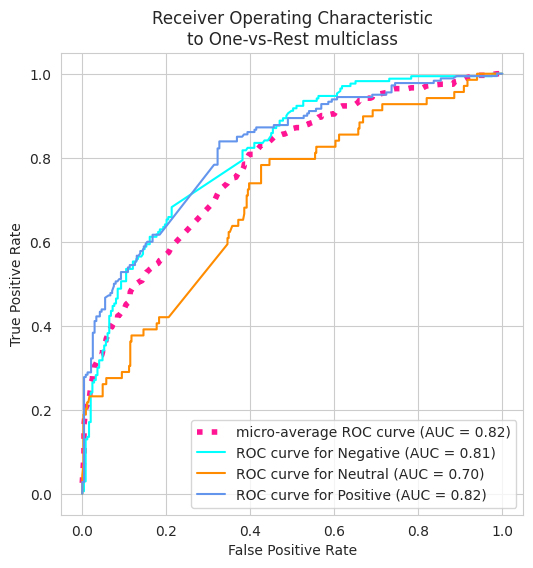

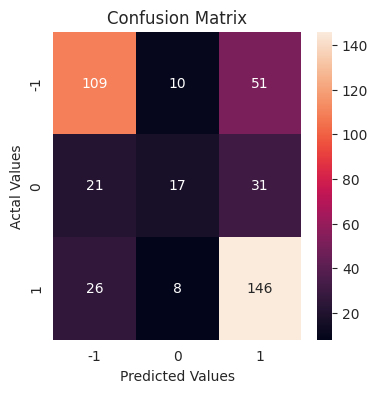

None
              precision    recall  f1-score   support

    negative       0.70      0.64      0.67       170
     neutral       0.49      0.25      0.33        69
    positive       0.64      0.81      0.72       180

    accuracy                           0.65       419
   macro avg       0.61      0.57      0.57       419
weighted avg       0.64      0.65      0.63       419

Accuracy :  0.649164677804296
Precison :  0.6385668135825151
Recall :  0.649164677804296
F1 :  0.6326066904881839


In [ ]:
train_predict_visualize(LGBMClassifier(),"LGBM", parameters = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]})

In [ ]:
# accuracy

**Accuracy**

In [ ]:
# models

In [ ]:
# accuracy

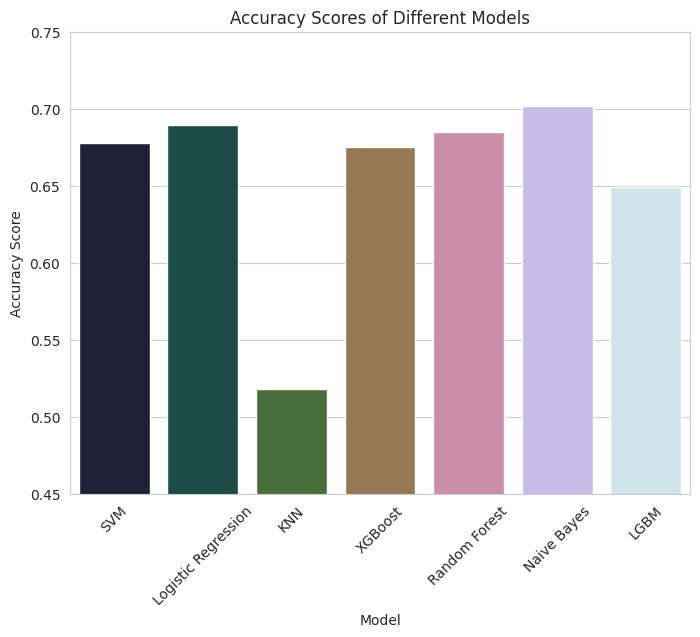

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracy, palette='cubehelix')
plt.ylim(0.45, 0.75)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation = 45)
plt.title('Accuracy Scores of Different Models')

# Show the plot
plt.show()

In [ ]:
# training_time

**Training Time**

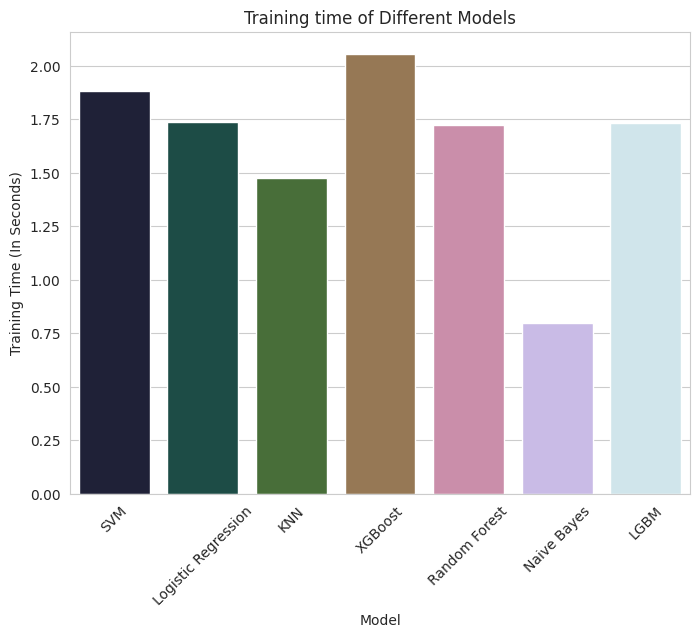

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=training_time, palette='cubehelix')
# plt.ylim(0.70, 0.80)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Training Time (In Seconds)')
plt.xticks(rotation = 45)
plt.title('Training time of Different Models')

# Show the plot
plt.show()

### Over Sampled Data

In [ ]:
def train_predict_visualize_oversampled(model, name, parameters):
  print(f"Model Name :{name}\n")
  t0 = time.time()
# Perform Grid Search
  grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
  grid_search.fit(sm_xtrain_tfidf, list(sm_train_y))
  # model.fit(train_vectors, list(y_train))
  preds = grid_search.predict(test_vectors)
  t1 = time.time()
  print(f"Time taken is {(t1-t0):.3f} Seconds.\n")
  training_time.append(t1-t0)
  print(print_metrices(y_test,preds))


In [ ]:
training_time = []
accuracy = []
models = ["SVM", "Logistic Regression", "KNN", "XGBoost", "Random Forest", "Naive Bayes", "LGBM"]

In [ ]:
# from sklearn import svm
# # Perform classification with SVM, kernel=linear
# classifier_linear = svm.SVC(kernel='linear')
# t0 = time.time()
# classifier_linear.fit(train_vectors, list(train_df['author_labels']))
# t1 = time.time()
# prediction_linear = classifier_linear.predict(test_vectors)
# t2 = time.time()
# time_linear_train = t1-t0
# time_linear_predict = t2-t1

**SVM**

Model Name :SVM

Time taken is 4.379 Seconds.



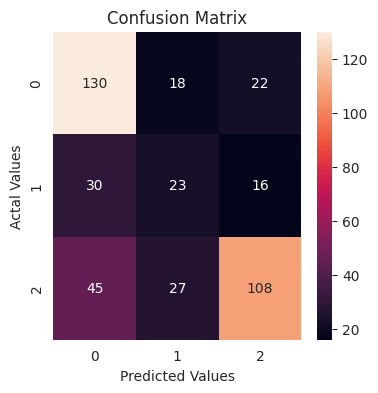

None
              precision    recall  f1-score   support

    negative       0.63      0.76      0.69       170
     neutral       0.34      0.33      0.34        69
    positive       0.74      0.60      0.66       180

    accuracy                           0.62       419
   macro avg       0.57      0.57      0.56       419
weighted avg       0.63      0.62      0.62       419

Accuracy :  0.6229116945107399
Precison :  0.6307727882444033
Recall :  0.6229116945107399
F1 :  0.6212371206666516
None


In [ ]:
train_predict_visualize_oversampled(SVC(kernel = 'linear'), "SVM", parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight' : ['balanced']})

Logistic Regression
Naive Bayes classifier
K-nearest neighbors (KNN)
Random Forest
Lasso Regression
Ridge Regression
SVM – Linear Kernel
LightGBM Classifier
XGBoost
CatBoost Classifie

**Logistic Regression**

Model Name :Logistic Regression

Time taken is 1.007 Seconds.



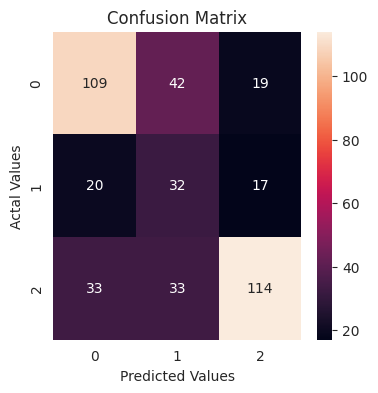

None
              precision    recall  f1-score   support

    negative       0.67      0.64      0.66       170
     neutral       0.30      0.46      0.36        69
    positive       0.76      0.63      0.69       180

    accuracy                           0.61       419
   macro avg       0.58      0.58      0.57       419
weighted avg       0.65      0.61      0.62       419

Accuracy :  0.6085918854415274
Precison :  0.6487308593510126
Recall :  0.6085918854415274
F1 :  0.6231051347938946
None


In [ ]:
train_predict_visualize_oversampled(LogisticRegression(), "Logistic Regression", parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
)

**KNN**

Model Name :KNN

Time taken is 0.729 Seconds.



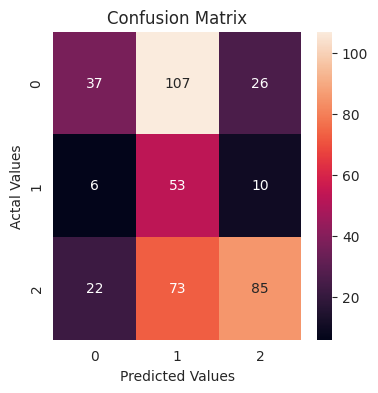

None
              precision    recall  f1-score   support

    negative       0.57      0.22      0.31       170
     neutral       0.23      0.77      0.35        69
    positive       0.70      0.47      0.56       180

    accuracy                           0.42       419
   macro avg       0.50      0.49      0.41       419
weighted avg       0.57      0.42      0.43       419

Accuracy :  0.41766109785202865
Precison :  0.5701928179735641
Recall :  0.41766109785202865
F1 :  0.4281899463200023
None


In [ ]:
train_predict_visualize_oversampled(KNeighborsClassifier(), "KNN", parameters = {'n_neighbors': [3, 5, 7]})

**XGBoost**

Model Name :XGBoost

Time taken is 36.393 Seconds.



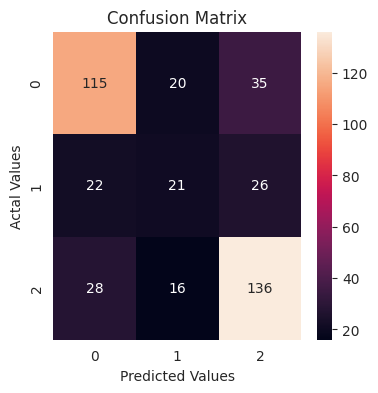

None
              precision    recall  f1-score   support

    negative       0.70      0.68      0.69       170
     neutral       0.37      0.30      0.33        69
    positive       0.69      0.76      0.72       180

    accuracy                           0.65       419
   macro avg       0.59      0.58      0.58       419
weighted avg       0.64      0.65      0.64       419

Accuracy :  0.649164677804296
Precison :  0.6400235334302874
Recall :  0.649164677804296
F1 :  0.6433980713979781
None


In [ ]:
train_predict_visualize_oversampled(XGBClassifier(), "XGBoost", parameters = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]})

**Random Forest**

Model Name :Random Forest

Time taken is 4.745 Seconds.



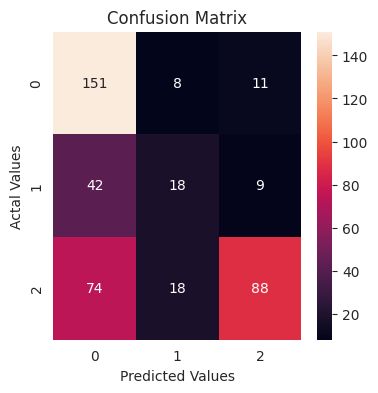

None
              precision    recall  f1-score   support

    negative       0.57      0.89      0.69       170
     neutral       0.41      0.26      0.32        69
    positive       0.81      0.49      0.61       180

    accuracy                           0.61       419
   macro avg       0.60      0.55      0.54       419
weighted avg       0.65      0.61      0.60       419

Accuracy :  0.6133651551312649
Precison :  0.6468645858981328
Recall :  0.6133651551312649
F1 :  0.5953821919178041
None


In [ ]:
train_predict_visualize_oversampled(RandomForestClassifier(), "Random Forest", parameters = {'n_estimators': [100, 200], 'max_depth': [5, 10]})

**Naive Bayes**

Model Name :Naive Bayes

Time taken is 0.057 Seconds.



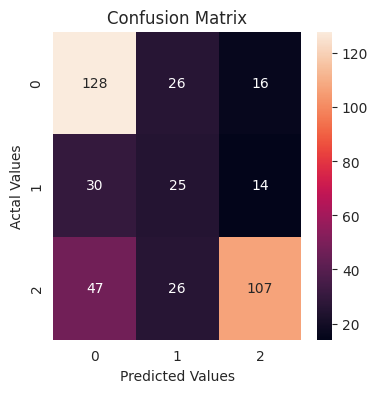

None
              precision    recall  f1-score   support

    negative       0.62      0.75      0.68       170
     neutral       0.32      0.36      0.34        69
    positive       0.78      0.59      0.68       180

    accuracy                           0.62       419
   macro avg       0.58      0.57      0.57       419
weighted avg       0.64      0.62      0.62       419

Accuracy :  0.6205250596658711
Precison :  0.642321910434013
Recall :  0.6205250596658711
F1 :  0.6233834508430333
None


In [ ]:
train_predict_visualize_oversampled(MultinomialNB(),"Naive Bayes", parameters = {'alpha': [0.1, 1, 10]})

**LGBM**

Model Name :LGBM

Time taken is 8.344 Seconds.



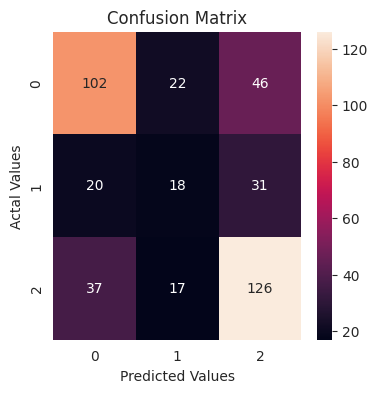

None
              precision    recall  f1-score   support

    negative       0.64      0.60      0.62       170
     neutral       0.32      0.26      0.29        69
    positive       0.62      0.70      0.66       180

    accuracy                           0.59       419
   macro avg       0.53      0.52      0.52       419
weighted avg       0.58      0.59      0.58       419

Accuracy :  0.5871121718377088
Precison :  0.5789265283742958
Recall :  0.5871121718377088
F1 :  0.5812841060294165
None


In [ ]:
train_predict_visualize_oversampled(LGBMClassifier(),"LGBM", parameters = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]})

In [ ]:
# accuracy

**Accuracy**

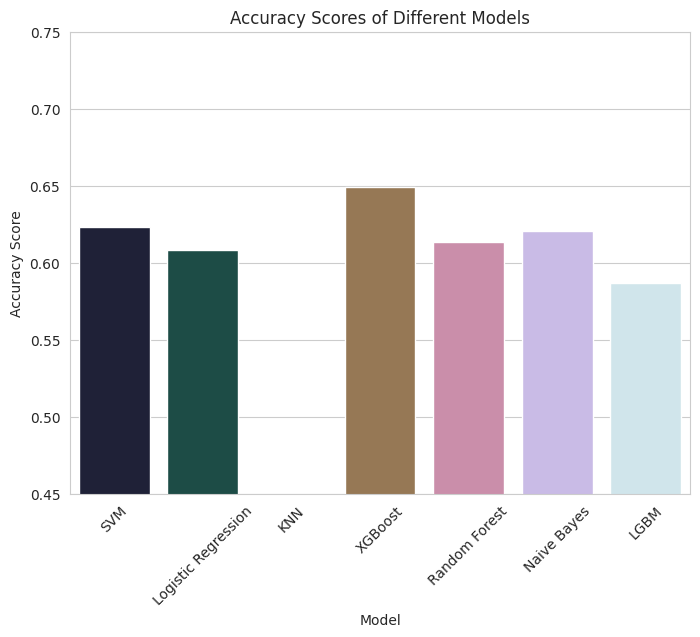

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracy, palette='cubehelix')
plt.ylim(0.45, 0.75)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation = 45)
plt.title('Accuracy Scores of Different Models')

# Show the plot
plt.show()

**Training Time**

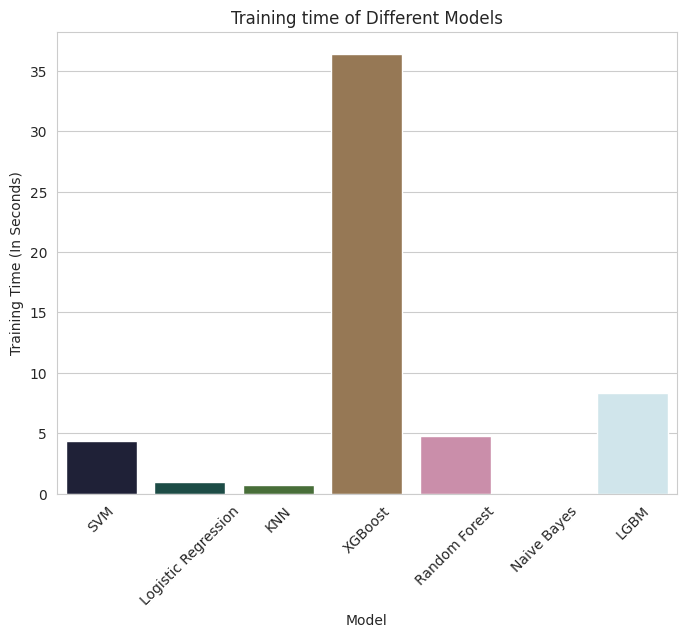

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=training_time, palette='cubehelix')
# plt.ylim(0.70, 0.80)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Training Time (In Seconds)')
plt.xticks(rotation = 45)
plt.title('Training time of Different Models')

# Show the plot
plt.show()

### Under Sampled Data

In [ ]:
def train_predict_visualize_undersampled(model, name, parameters):
  print(f"Model Name :{name}\n")
  t0 = time.time()
# Perform Grid Search
  grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
  grid_search.fit(tl_xtrain_tfidf, list(tl_train_y))
  # model.fit(train_vectors, list(y_train))
  preds = grid_search.predict(test_vectors)
  t1 = time.time()
  print(f"Time taken is {(t1-t0):.3f} Seconds.\n")
  training_time.append(t1-t0)
  print(print_metrices(y_test,preds))


In [ ]:
training_time = []
accuracy = []
models = ["SVM", "Logistic Regression", "KNN", "XGBoost", "Random Forest", "Naive Bayes", "LGBM"]

In [ ]:
# from sklearn import svm
# # Perform classification with SVM, kernel=linear
# classifier_linear = svm.SVC(kernel='linear')
# t0 = time.time()
# classifier_linear.fit(train_vectors, list(train_df['author_labels']))
# t1 = time.time()
# prediction_linear = classifier_linear.predict(test_vectors)
# t2 = time.time()
# time_linear_train = t1-t0
# time_linear_predict = t2-t1

**SVM**

Model Name :SVM

Time taken is 3.805 Seconds.



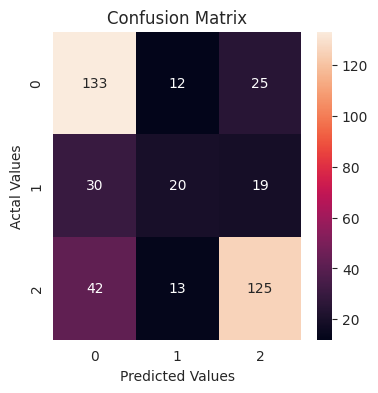

None
              precision    recall  f1-score   support

    negative       0.65      0.78      0.71       170
     neutral       0.44      0.29      0.35        69
    positive       0.74      0.69      0.72       180

    accuracy                           0.66       419
   macro avg       0.61      0.59      0.59       419
weighted avg       0.65      0.66      0.65       419

Accuracy :  0.6634844868735084
Precison :  0.6541657381099096
Recall :  0.6634844868735084
F1 :  0.6533103127987717
None


In [ ]:
train_predict_visualize_undersampled(SVC(kernel = 'linear'), "SVM", parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight' : ['balanced']})

Logistic Regression
Naive Bayes classifier
K-nearest neighbors (KNN)
Random Forest
Lasso Regression
Ridge Regression
SVM – Linear Kernel
LightGBM Classifier
XGBoost
CatBoost Classifie

**Logistic Regression**

Model Name :Logistic Regression

Time taken is 0.577 Seconds.



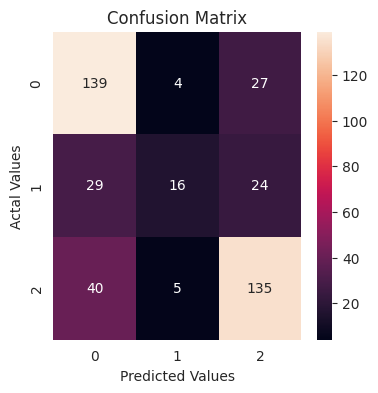

None
              precision    recall  f1-score   support

    negative       0.67      0.82      0.74       170
     neutral       0.64      0.23      0.34        69
    positive       0.73      0.75      0.74       180

    accuracy                           0.69       419
   macro avg       0.68      0.60      0.60       419
weighted avg       0.69      0.69      0.67       419

Accuracy :  0.6921241050119332
Precison :  0.6883315764226535
Recall :  0.6921241050119332
F1 :  0.6713668304880294
None


In [ ]:
train_predict_visualize_undersampled(LogisticRegression(), "Logistic Regression", parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
)

**KNN**

Model Name :KNN

Time taken is 1.149 Seconds.



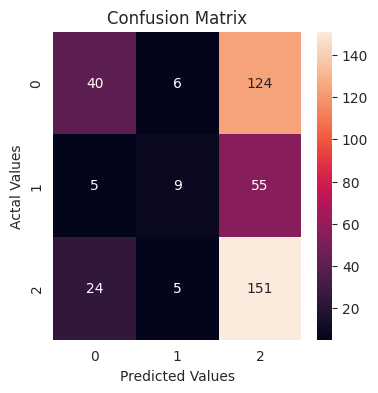

None
              precision    recall  f1-score   support

    negative       0.58      0.24      0.33       170
     neutral       0.45      0.13      0.20        69
    positive       0.46      0.84      0.59       180

    accuracy                           0.48       419
   macro avg       0.50      0.40      0.38       419
weighted avg       0.51      0.48      0.42       419

Accuracy :  0.477326968973747
Precison :  0.50588152983608
Recall :  0.477326968973747
F1 :  0.4235013297476599
None


In [ ]:
train_predict_visualize_undersampled(KNeighborsClassifier(), "KNN", parameters = {'n_neighbors': [3, 5, 7]})

**XGBoost**

Model Name :XGBoost

Time taken is 20.820 Seconds.



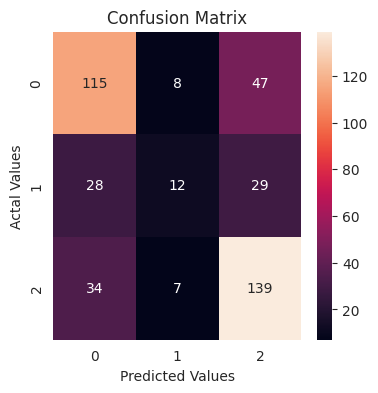

None
              precision    recall  f1-score   support

    negative       0.65      0.68      0.66       170
     neutral       0.44      0.17      0.25        69
    positive       0.65      0.77      0.70       180

    accuracy                           0.63       419
   macro avg       0.58      0.54      0.54       419
weighted avg       0.61      0.63      0.61       419

Accuracy :  0.6348448687350835
Precison :  0.6145363653724402
Recall :  0.6348448687350835
F1 :  0.6124431016171186
None


In [ ]:
train_predict_visualize_undersampled(XGBClassifier(), "XGBoost", parameters = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]})

**Random Forest**

Model Name :Random Forest

Time taken is 6.250 Seconds.



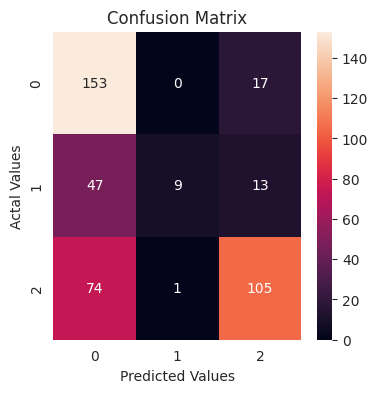

None
              precision    recall  f1-score   support

    negative       0.56      0.90      0.69       170
     neutral       0.90      0.13      0.23        69
    positive       0.78      0.58      0.67       180

    accuracy                           0.64       419
   macro avg       0.75      0.54      0.53       419
weighted avg       0.71      0.64      0.60       419

Accuracy :  0.6372315035799523
Precison :  0.708895005487518
Recall :  0.6372315035799523
F1 :  0.603541005130081
None


In [ ]:
train_predict_visualize_undersampled(RandomForestClassifier(), "Random Forest", parameters = {'n_estimators': [100, 200], 'max_depth': [5, 10]})

**Naive Bayes**

Model Name :Naive Bayes

Time taken is 0.108 Seconds.



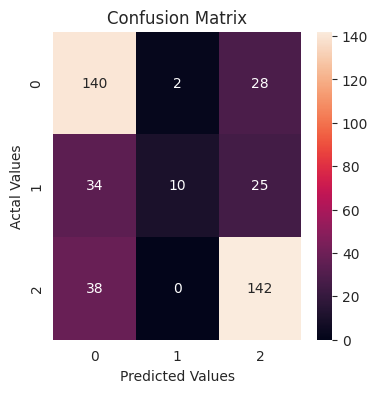

None
              precision    recall  f1-score   support

    negative       0.66      0.82      0.73       170
     neutral       0.83      0.14      0.25        69
    positive       0.73      0.79      0.76       180

    accuracy                           0.70       419
   macro avg       0.74      0.59      0.58       419
weighted avg       0.72      0.70      0.66       419

Accuracy :  0.6968973747016707
Precison :  0.7179977900246284
Recall :  0.6968973747016707
F1 :  0.6633994436276109
None


In [ ]:
train_predict_visualize_undersampled(MultinomialNB(),"Naive Bayes", parameters = {'alpha': [0.1, 1, 10]})

**LGBM**

Model Name :LGBM

Time taken is 7.042 Seconds.



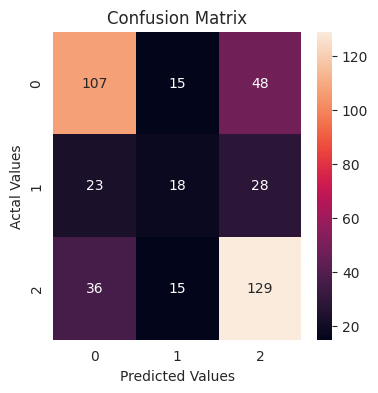

None
              precision    recall  f1-score   support

    negative       0.64      0.63      0.64       170
     neutral       0.38      0.26      0.31        69
    positive       0.63      0.72      0.67       180

    accuracy                           0.61       419
   macro avg       0.55      0.54      0.54       419
weighted avg       0.59      0.61      0.60       419

Accuracy :  0.6062052505966588
Precison :  0.5936076513984222
Recall :  0.6062052505966588
F1 :  0.5969640939808004
None


In [ ]:
train_predict_visualize_undersampled(LGBMClassifier(),"LGBM", parameters = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]})

In [ ]:
# accuracy

**Accuracy**

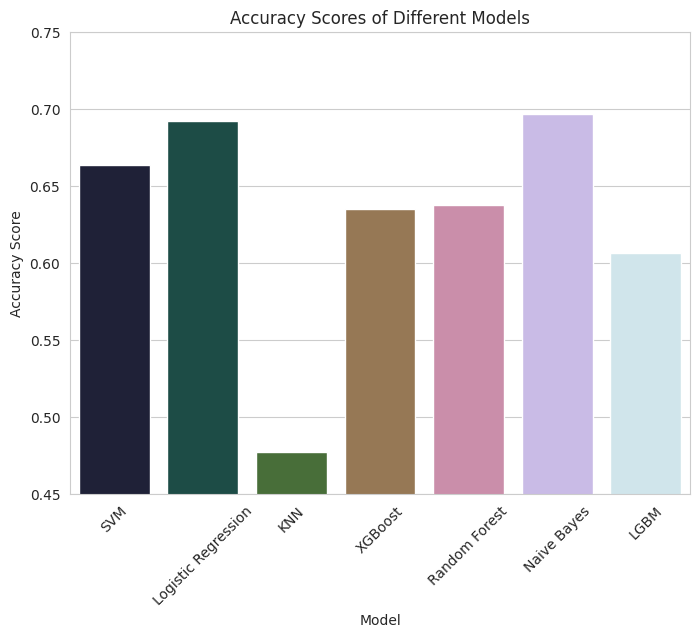

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracy, palette='cubehelix')
plt.ylim(0.45, 0.75)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation = 45)
plt.title('Accuracy Scores of Different Models')

# Show the plot
plt.show()

**Training Time**

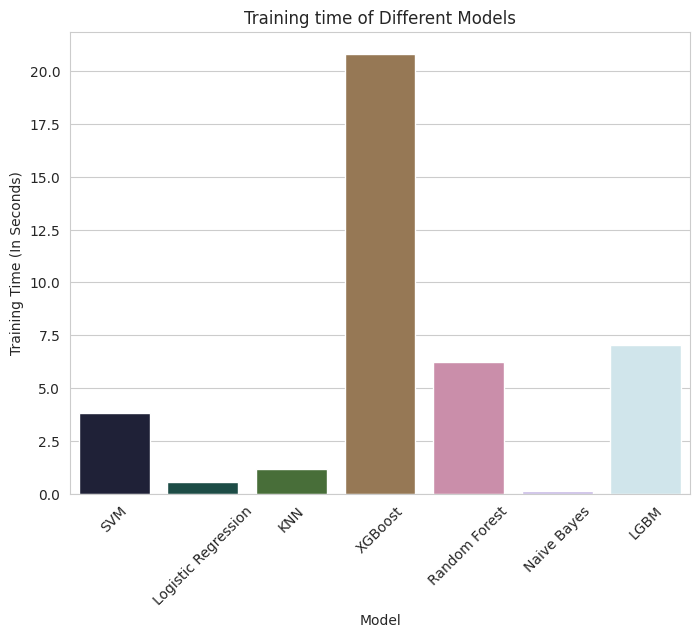

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=training_time, palette='cubehelix')
# plt.ylim(0.70, 0.80)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Training Time (In Seconds)')
plt.xticks(rotation = 45)
plt.title('Training time of Different Models')

# Show the plot
plt.show()